<a href="https://colab.research.google.com/github/KeshavAman/Fake-news-detection-using-Machine-Learning/blob/main/Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing of libraries**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading dataset**

In [129]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/Fake-news-detection-using-Machine-Learning/main/fake_new_dataset.csv')

**Checking Information of our dataset**

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3119 non-null   int64 
 1   title        3118 non-null   object
 2   text         3119 non-null   object
 3   subcategory  3119 non-null   object
 4   label        3119 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 122.0+ KB


**Take a glance at our dataset**

In [131]:
dataset.head()

,Unnamed: 0,title,text,subcategory,label
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0


**Checking rows and columns of dataset**

In [132]:
dataset.shape

(3119, 5)

**Dropping null values in dataset**

In [133]:
dataset.isnull().sum()

Unnamed: 0     0
title          1
text           0
subcategory    0
label          0
dtype: int64

In [137]:
dataset = dataset.dropna(axis = 0)
dataset.shape

(3119, 4)

In [138]:
dataset.head()

,Unnamed: 0,text,subcategory,label
0,0,Facebook has shuttered a popular group for Mic...,false news,0
1,1,We can now officially put to rest all comparis...,true,1
2,2,The Ministry of Health in Bermuda has confirme...,true,1
3,3,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,Locking down much of the country may have help...,false news,0


**Value count of dataset**

In [139]:
dataset['label'].value_counts()

1    2061
0    1058
Name: label, dtype: int64

**Visualize the value count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


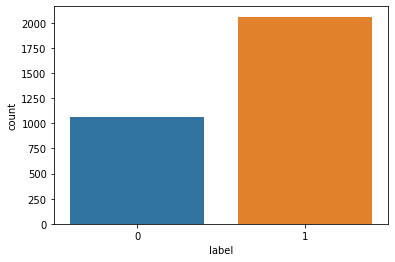

In [140]:
sns.countplot(dataset['label'])

**Pairplot**

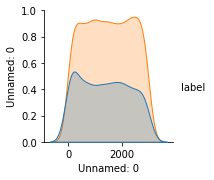

In [141]:
sns.pairplot(dataset, hue = 'label')

**Heatmap**

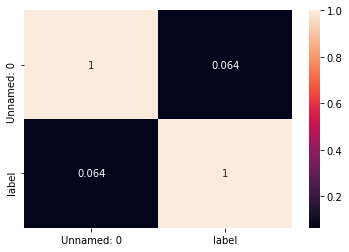

In [142]:
sns.heatmap(dataset.corr(), annot = True)

**Splitting and Scaling of dataset**

In [143]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,3:4].values
Y = dataset.iloc[:,3].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.25, random_state = 0)

In [144]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Dimensions**

In [145]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (2339, 1)
X_test shape :  (780, 1)
Y_train shape :  (2339,)
Y_test shape :  (780,)


**Using Naive Bayes**

In [146]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train , Y_train)
pred_nb = nb.predict(X_test)

In [147]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_nb))
print(classification_report(Y_test, pred_nb))

[[268   0]
 [  0 512]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       512

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



**Using Random Forest**

In [148]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))

[[268   0]
 [  0 512]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       512

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



**Using Logistic Regression** 

In [150]:
from sklearn.linear_model import LogisticRegression

lrr = LogisticRegression(random_state = 45)
lrr.fit(X_train, Y_train)
pred_lrr = lrr.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_lrr))
print(classification_report(Y_test, pred_lrr))

[[268   0]
 [  0 512]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       512

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



**Using Support Vector Classifier**

In [152]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)

In [153]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_svc))
print(classification_report(Y_test, pred_svc))

[[268   0]
 [  0 512]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       512

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

